## Censored Data--- a question

Imagine that you sample data with a detection threold of 1.  You find the mean of the data to be 10.  You have reason to believe that the data come from a gaussian distribution with mean zero.   What is the width ($\sigma$) of the distribtion? 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
## your work goes here


## MLE with Gaussian Mixture Model


Imagine we have a Gaussian mixture of distributions $\mathcal{N}(-1,1.5)$, $\mathcal{N}(0,1)$, and $\mathcal{N}(3,0.5)$. In this case, $M$ = 3 (number of separate Gaussian distributions), $\boldsymbol{\theta}$ includes the normalization factors for each distribution, $\alpha_1$,$\alpha_2$,and $\alpha_3$ as well as the descriptive parameters $\mu_1$,$\sigma_1$,$\mu_2$,$\sigma_2$,and $\mu_3$,$\sigma_3$


First we will define our distributions and combine them using `numpy.concatenate`. Then we will create models using `sklearn.mixture.GaussianMixture`that range from one class to ten classes and calculate the AIC and BIC to find the optimal number of classes for our data.

[Code Reference](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

In [62]:
from sklearn.mixture import GaussianMixture

random_state = np.random.RandomState(seed=1)

X = np.concatenate([random_state.normal(-1, 1.5, 350),
                    random_state.normal(0, 1, 500),
                    random_state.normal(3, 0.5, 150)]).reshape(-1, 1)

N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

Next, we'll plot our results. By using np.argmin on our AIC and BIC arrays, we can find the model with the most optimal  value. After this, we will use .score_samples on this model to compute the log-likelihood (the PDF of the sum of Gaussians). Then we can use .predict_proba on our log-likelihood to get the density of the th component.

Afterward, we can plot pdf, our Gaussian mixture, and pdf_individual for the three separate Gaussians along with the histogram of our data.

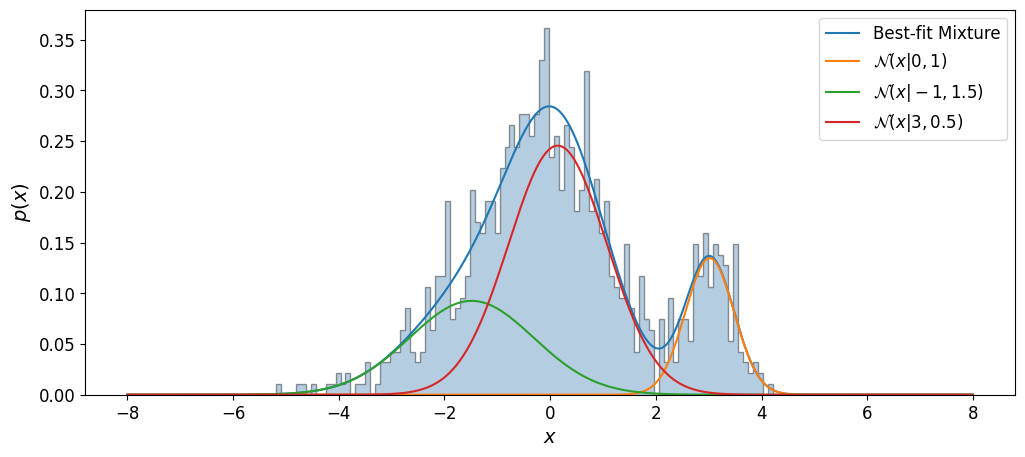

In [65]:
fig = plt.figure(figsize=(12, 5))
x = np.linspace(-8, 8, 1000)

M_best = models[np.argmin(AIC)] 
logprob = M_best.score_samples(x.reshape(-1, 1))
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

labels = ['Best-fit Mixture','$\mathcal{N}(x|0,1)$',
          '$\mathcal{N}(x|-1,1.5)$','$\mathcal{N}(x|3,0.5)$']

plt.hist(X, 100, density=True, histtype='stepfilled', 
        alpha=0.4,color = 'steelblue',edgecolor = 'black')

#Plot the Gaussian mixture
plt.plot(x, pdf, label = labels[0])

#Plot the individual Gaussians
for i, j in enumerate([1,2,3]):
    plt.plot(x,pdf_individual[:,i],label = labels[j])
    

plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$p(x)$', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12);

Now lets look at two information criteria to assess the right number of paramters for this fit.

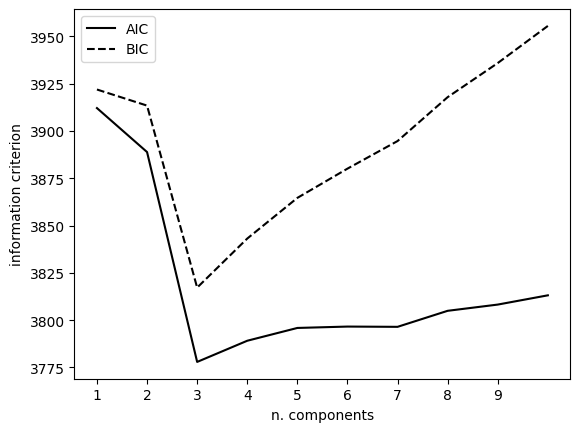

In [67]:
plt.plot(N, AIC, '-k', label='AIC')
plt.plot(N, BIC, '--k', label='BIC')

plt.xticks(np.arange(1,10,1))
plt.xlabel('n. components')
plt.ylabel('information criterion')
plt.legend(loc=2)